In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("smadive/pet-disease-images")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/pet-disease-images


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [11]:
# Define paths
data_dir = '/kaggle/input/pet-disease-images/data'
img_height, img_width = 224, 224
batch_size = 32

In [12]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [13]:
# Define paths
# Use the path returned by kagglehub.dataset_download
data_dir = path
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 1339 images belonging to 1 classes.


In [14]:
# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 334 images belonging to 1 classes.


In [15]:
# import libs
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [16]:
# Load the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

In [17]:
# Freeze the base model
base_model.trainable = False

In [18]:
# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [19]:
# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

In [23]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Define the model
from tensorflow.keras.models import Model # Import Model here
from tensorflow.keras.optimizers import Adam

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


23/42 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


42/42 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 1.0

In [22]:
base_model.trainable = True # freeze
for layer in base_model.layers[:-30]:  # fine-tune last 30 layers
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 149s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - ac

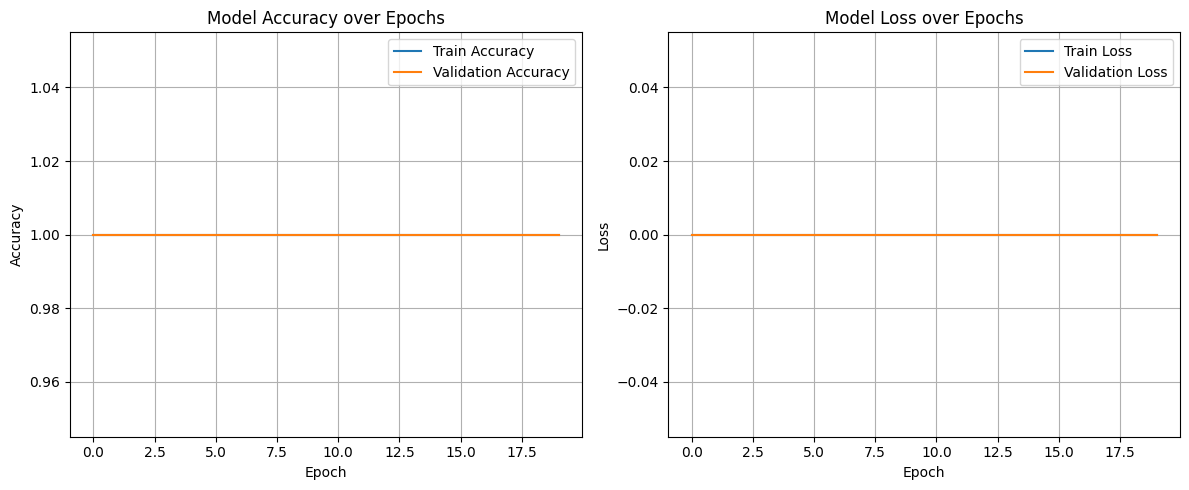

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

# Save the model
model.save('pet_disease_classifier.h5')

11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00


Validation Accuracy: 100.00%


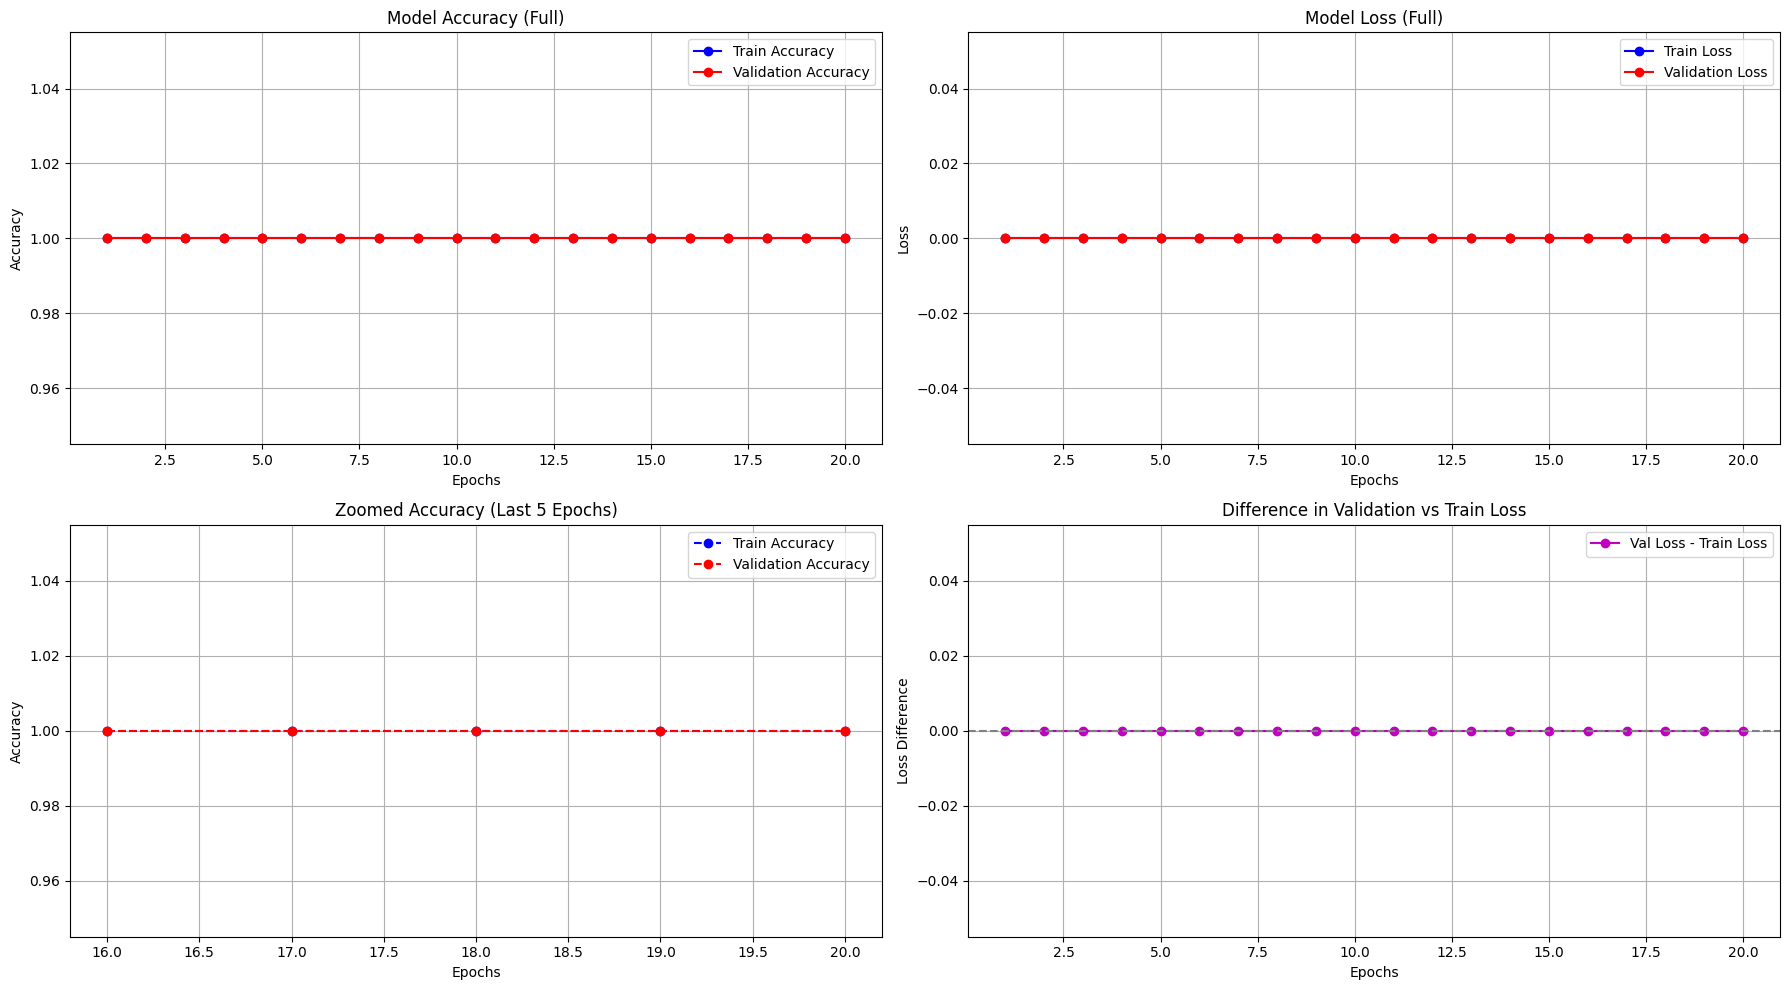

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Extract values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(18, 10))

# 1. Full Accuracy Plot
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, 'bo-', label='Train Accuracy')
plt.plot(epochs_range, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Model Accuracy (Full)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 2. Full Loss Plot
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, 'bo-', label='Train Loss')
plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
plt.title('Model Loss (Full)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 3. Zoomed-in Accuracy (Last 5 Epochs)
plt.subplot(2, 2, 3)
plt.plot(epochs_range[-5:], acc[-5:], 'bo--', label='Train Accuracy')
plt.plot(epochs_range[-5:], val_acc[-5:], 'ro--', label='Validation Accuracy')
plt.title('Zoomed Accuracy (Last 5 Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 4. Train vs. Validation Loss Difference
plt.subplot(2, 2, 4)
loss_diff = np.array(val_loss) - np.array(loss)
plt.plot(epochs_range, loss_diff, 'mo-', label='Val Loss - Train Loss')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Difference in Validation vs Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Difference')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
